In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read JSON file and convert to CSV
df = pd.read_json('assignment_dataset.json')
df.to_csv('assignment_dataset.csv',encoding='utf-8', index=False)

In [3]:
df = pd.read_csv('assignment_dataset.csv')
print('Main data set shape : ',df.shape)
df_copy = df.copy()
df.head()

Main data set shape :  (1956, 13)


,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
0,KOCU4806726,HDMU,CNNGB,NaN,NaN,USNYC,NaN,NaN,2021-06-12T18:00:00,NaN,Vessel arrival,1.0,2021-06-12T18:00:00
1,KOCU4138843,HDMU,VNVUT,NaN,NaN,USORF,2021-06-13T16:00:00-05:00,NaN,2021-06-14T02:50:07.504794-05:00,NaN,Unclassified,1.0,2021-06-12T20:00:00
2,HDMU4753869,HDMU,VNVUT,NaN,NaN,USSAV,2021-06-16T14:00:00-05:00,NaN,2021-06-17T15:21:59.522328-05:00,NaN,Unclassified,1.0,2021-06-15T19:00:00
3,KOCU4823359,HDMU,CNNGB,NaN,NaN,USNYC,NaN,NaN,2021-05-16T19:00:00,NaN,Vessel arrival,1.0,2021-05-16T19:00:00
4,MSCU5135983,MSCU,VNSGN,NaN,NaN,USLGB,NaN,NaN,2021-06-04T00:00:00,NaN,Vessel arrival,2.0,2021-06-04T00:00:00


In [4]:
df.groupby(['pol','pod']).size().reset_index().rename(columns = {0:'Count'})

,pol,pod,Count
0,BGVAR,USSAV,1
1,CNDLC,USNYC,6
2,CNDLC,USSAV,3
3,CNFOC,BRFOR,2
4,CNFOC,USBAL,1
...,...,...,...
115,VNVUT,USLGB,5
116,VNVUT,USNYC,82
117,VNVUT,USORF,17
118,VNVUT,USSAV,69


## Data Preprocessing

In [5]:
df[df.last_container_event.isna()]

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
7,BMOU4504233,ZIMU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,ZCSU7144592,ZIMU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,DFSU4199240,COSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,CCLU5256867,COSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,CSNU8508512,COSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,TGCU5061311,OOLU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,BMOU6009970,MSCU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1865,TGBU5368222,ZIMU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,BEAU6236813,COSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing these cases as all values are NaN

In [6]:
df = df[df.last_container_event.notna()]
print('Data set shape after removing last_container_event = NaN : ',df.shape)
df.head()

Data set shape after removing last_container_event = NaN :  (1772, 13)


,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
0,KOCU4806726,HDMU,CNNGB,NaN,NaN,USNYC,NaN,NaN,2021-06-12T18:00:00,NaN,Vessel arrival,1.0,2021-06-12T18:00:00
1,KOCU4138843,HDMU,VNVUT,NaN,NaN,USORF,2021-06-13T16:00:00-05:00,NaN,2021-06-14T02:50:07.504794-05:00,NaN,Unclassified,1.0,2021-06-12T20:00:00
2,HDMU4753869,HDMU,VNVUT,NaN,NaN,USSAV,2021-06-16T14:00:00-05:00,NaN,2021-06-17T15:21:59.522328-05:00,NaN,Unclassified,1.0,2021-06-15T19:00:00
3,KOCU4823359,HDMU,CNNGB,NaN,NaN,USNYC,NaN,NaN,2021-05-16T19:00:00,NaN,Vessel arrival,1.0,2021-05-16T19:00:00
4,MSCU5135983,MSCU,VNSGN,NaN,NaN,USLGB,NaN,NaN,2021-06-04T00:00:00,NaN,Vessel arrival,2.0,2021-06-04T00:00:00


In [7]:
# Converting to Datetime

df.scheduled_pol_etd                  = pd.to_datetime(df.scheduled_pol_etd, utc = True, format='%Y-%m-%d %H:%M')
df.pol_atd                            = pd.to_datetime(df.pol_atd, utc = True, format='%Y-%m-%d %H:%M')
df.scheduled_pod_eta                  = pd.to_datetime(df.scheduled_pod_eta, utc = True, format='%Y-%m-%d %H:%M')
df.pt_predicted_pod_eta         = pd.to_datetime(df.pt_predicted_pod_eta, utc = True, format='%Y-%m-%d %H:%M')
df.container_pod_actual_discharge     = pd.to_datetime(df.container_pod_actual_discharge, utc = True, format='%Y-%m-%d %H:%M')
df.container_pod_scheduled_discharge  = pd.to_datetime(df.container_pod_scheduled_discharge, utc = True, format='%Y-%m-%d %H:%M')
df.pod_ata                            = pd.to_datetime(df.pod_ata, utc = True, format='%Y-%m-%d %H:%M')

df.dtypes

cntr_no                                           object
carrier_no                                        object
pol                                               object
scheduled_pol_etd                    datetime64[ns, UTC]
pol_atd                              datetime64[ns, UTC]
pod                                               object
scheduled_pod_eta                    datetime64[ns, UTC]
pod_ata                              datetime64[ns, UTC]
pt_predicted_pod_eta           datetime64[ns, UTC]
container_pod_actual_discharge       datetime64[ns, UTC]
last_container_event                              object
vessel_legs                                      float64
container_pod_scheduled_discharge    datetime64[ns, UTC]
dtype: object

In [8]:
print(df[df.container_pod_actual_discharge.notna() == df.container_pod_scheduled_discharge.notna()].shape)
print(df[df.container_pod_actual_discharge.notna() & df.container_pod_scheduled_discharge.notna()].shape)
# Both actual_discharge and scheduled_dischared columns have same values. 
# Hence, we can say that both these values are always same

df.container_pod_actual_discharge = df.container_pod_actual_discharge.fillna(df.container_pod_scheduled_discharge)

df = df.drop('container_pod_scheduled_discharge', axis = 1)
df.rename(columns = {'container_pod_actual_discharge':'discharge_time'}, inplace = True)

df.head()

(35, 13)
(35, 13)


,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,NaT,NaT,2021-06-12 18:00:00+00:00,2021-06-12 18:00:00+00:00,Vessel arrival,1.0
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,NaT,2021-06-14 07:50:07.504794+00:00,2021-06-12 20:00:00+00:00,Unclassified,1.0
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,NaT,2021-06-17 20:21:59.522328+00:00,2021-06-15 19:00:00+00:00,Unclassified,1.0
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,NaT,NaT,2021-05-16 19:00:00+00:00,2021-05-16 19:00:00+00:00,Vessel arrival,1.0
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,NaT,NaT,2021-06-04 00:00:00+00:00,2021-06-04 00:00:00+00:00,Vessel arrival,2.0


In [9]:
# Creating a random dataset to calculate pod_ata

random     = df[df.pod_ata.notna()]
diff       = random.groupby('pod').apply(lambda x : x['discharge_time'] - x['pod_ata']).mean()

print('Mean difference between discharge_time and pod_ata : ',diff)

df.pod_ata = df.pod_ata.fillna(df.discharge_time - diff)

df.head()

Mean difference between discharge_time and pod_ata :  1 days 16:04:56.243725490


,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,NaT,2021-06-11 01:55:03.756274510+00:00,2021-06-12 18:00:00+00:00,2021-06-12 18:00:00+00:00,Vessel arrival,1.0
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,2021-06-11 03:55:03.756274510+00:00,2021-06-14 07:50:07.504794+00:00,2021-06-12 20:00:00+00:00,Unclassified,1.0
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,2021-06-14 02:55:03.756274510+00:00,2021-06-17 20:21:59.522328+00:00,2021-06-15 19:00:00+00:00,Unclassified,1.0
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,NaT,2021-05-15 02:55:03.756274510+00:00,2021-05-16 19:00:00+00:00,2021-05-16 19:00:00+00:00,Vessel arrival,1.0
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,NaT,2021-06-02 07:55:03.756274510+00:00,2021-06-04 00:00:00+00:00,2021-06-04 00:00:00+00:00,Vessel arrival,2.0


In [10]:
# Creating a random dataset to calculate scheduled_pod_eta

random               = df[df.scheduled_pod_eta.notna()]
diff                 = random.groupby('pod').apply(lambda x : x['discharge_time'] - x['scheduled_pod_eta']).mean()

print('Mean difference between discharge_time and scheduled_pod_eta : ',diff)

df.scheduled_pod_eta = df.scheduled_pod_eta.fillna(df.discharge_time - diff)

df.head()

Mean difference between discharge_time and scheduled_pod_eta :  1 days 06:45:30.141110065


,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,2021-06-11 11:14:29.858889935+00:00,2021-06-11 01:55:03.756274510+00:00,2021-06-12 18:00:00+00:00,2021-06-12 18:00:00+00:00,Vessel arrival,1.0
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,2021-06-11 03:55:03.756274510+00:00,2021-06-14 07:50:07.504794+00:00,2021-06-12 20:00:00+00:00,Unclassified,1.0
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,2021-06-14 02:55:03.756274510+00:00,2021-06-17 20:21:59.522328+00:00,2021-06-15 19:00:00+00:00,Unclassified,1.0
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,2021-05-15 12:14:29.858889935+00:00,2021-05-15 02:55:03.756274510+00:00,2021-05-16 19:00:00+00:00,2021-05-16 19:00:00+00:00,Vessel arrival,1.0
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,2021-06-02 17:14:29.858889935+00:00,2021-06-02 07:55:03.756274510+00:00,2021-06-04 00:00:00+00:00,2021-06-04 00:00:00+00:00,Vessel arrival,2.0


## KPI Generation

In [11]:
temp_df = df.copy()

temp_df['actual_scheduled'] = df.pod_ata - df.scheduled_pod_eta
temp_df['actual_predicted'] = df.pod_ata - df.pt_predicted_pod_eta

temp_df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs,actual_scheduled,actual_predicted
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,2021-06-11 11:14:29.858889935+00:00,2021-06-11 01:55:03.756274510+00:00,2021-06-12 18:00:00+00:00,2021-06-12 18:00:00+00:00,Vessel arrival,1.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,2021-06-11 03:55:03.756274510+00:00,2021-06-14 07:50:07.504794+00:00,2021-06-12 20:00:00+00:00,Unclassified,1.0,-3 days +06:55:03.756274510,-4 days +20:04:56.251480510
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,2021-06-14 02:55:03.756274510+00:00,2021-06-17 20:21:59.522328+00:00,2021-06-15 19:00:00+00:00,Unclassified,1.0,-3 days +07:55:03.756274510,-4 days +06:33:04.233946510
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,2021-05-15 12:14:29.858889935+00:00,2021-05-15 02:55:03.756274510+00:00,2021-05-16 19:00:00+00:00,2021-05-16 19:00:00+00:00,Vessel arrival,1.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,2021-06-02 17:14:29.858889935+00:00,2021-06-02 07:55:03.756274510+00:00,2021-06-04 00:00:00+00:00,2021-06-04 00:00:00+00:00,Vessel arrival,2.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510


In theory, the absolute value of actual_predicted should be less than actual_scheduled to imply pt predictions are better than scheduled predictions. <br>
<b>Note - </b> The '-' sign implies that scheduled and pt prediction values are greater than pod_ata 

In [12]:
print('Cases where actual_predicted < actual_scheduled',temp_df[abs(temp_df.actual_predicted) < abs(temp_df.actual_scheduled)].shape)
print('Cases where actual_predicted > actual_scheduled',temp_df[abs(temp_df.actual_predicted) > abs(temp_df.actual_scheduled)].shape)
print('Cases where actual_predicted = actual_scheduled',temp_df[abs(temp_df.actual_predicted) == abs(temp_df.actual_scheduled)].shape)

print('Mean actual_predicted time : ', abs(temp_df.actual_predicted.mean()))
print('Mean actual_scheduled time : ', abs(temp_df.actual_scheduled.mean()))

print('Difference of actual_predicted and actual_scheduled time : ', abs(temp_df.actual_predicted.mean()) - abs(temp_df.actual_scheduled.mean()))

Cases where actual_predicted < actual_scheduled (295, 14)
Cases where actual_predicted > actual_scheduled (1236, 14)
Cases where actual_predicted = actual_scheduled (37, 14)
Mean actual_predicted time :  1 days 19:56:47.178332951
Mean actual_scheduled time :  0 days 09:19:26.102615424
Difference of actual_predicted and actual_scheduled time :  1 days 10:37:21.075717527


This implies that out of 1772 cases, <b>scheduled</b> predictions are <b>better</b> than pt predictions <b>1235 (69.7%)</b> times. <b>pt</b> predictions perform <b>better or same</b> as scheduled predictions only <b>333 (18.8%)</b> times.<br>

<b>pt</b> predictions were <b>off</b> by <b>1 day and 10 hours (34 hours)</b> in comparison with <b>scheduled</b> predictions. <br>

<b> Note - </b> As analyzed below, there are 204 (11.5%) cases where pt_predicted_pod_eta is NaT

In [13]:
temp_df.actual_predicted.dt.days.unique() # We find nan in this column

array([ -2.,  -4.,  -5.,  nan,   6.,  -3.,   1.,  -1.,   0.,  -8.,  -7.,
        14.,   3.,  36., -10.,  -6.,  -9.,  35.,   4.,   2.,   7.])

In [14]:
temp_df[temp_df.actual_predicted.isna()].head() # pt_predicted_pod_eta column contains NaT as well !!!!

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs,actual_scheduled,actual_predicted
9,TCLU5125101,HLCU,INMUN,2021-04-30 01:30:00+00:00,2021-04-30 19:00:00+00:00,USNYC,2021-05-20 23:00:00+00:00,2021-05-21 10:10:07+00:00,NaT,2021-05-21 12:46:00+00:00,Unclassified,1.0,0 days 11:10:07,NaT
18,HLXU8187667,HLCU,CNNGB,2021-04-13 14:00:00+00:00,2021-04-13 22:30:00+00:00,USNYC,2021-05-17 00:00:00+00:00,2021-05-20 03:30:08+00:00,NaT,2021-05-20 15:07:00+00:00,Gate out,1.0,3 days 03:30:08,NaT
24,MIEU3021551,MAEU,VNVUT,2021-04-08 23:00:00+00:00,2021-04-09 00:33:00+00:00,USLAX,2021-05-15 16:00:00+00:00,2021-05-12 15:57:00+00:00,NaT,2021-05-19 14:41:00+00:00,Gate out,2.0,-4 days +23:57:00,NaT
29,TCLU8882897,ONEY,CNYTN,2021-04-11 02:45:00+00:00,2021-04-11 02:45:00+00:00,USTIW,2021-04-30 06:30:00+00:00,2021-04-30 06:30:00+00:00,NaT,2021-05-09 01:05:00+00:00,Unload from vessel,1.0,0 days 00:00:00,NaT
30,TCNU9616918,ONEY,CNYTN,2021-04-11 02:45:00+00:00,2021-04-11 02:45:00+00:00,USTIW,2021-04-30 06:30:00+00:00,2021-04-30 06:30:00+00:00,NaT,2021-05-09 01:40:00+00:00,Unload from vessel,1.0,0 days 00:00:00,NaT


In [15]:
df = temp_df

df['actual_name_of_day']    = df.pod_ata.dt.day_name()
df['predicted_name_of_day'] = df.pt_predicted_pod_eta.dt.day_name()

df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs,actual_scheduled,actual_predicted,actual_name_of_day,predicted_name_of_day
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,2021-06-11 11:14:29.858889935+00:00,2021-06-11 01:55:03.756274510+00:00,2021-06-12 18:00:00+00:00,2021-06-12 18:00:00+00:00,Vessel arrival,1.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510,Friday,Saturday
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,2021-06-11 03:55:03.756274510+00:00,2021-06-14 07:50:07.504794+00:00,2021-06-12 20:00:00+00:00,Unclassified,1.0,-3 days +06:55:03.756274510,-4 days +20:04:56.251480510,Friday,Monday
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,2021-06-14 02:55:03.756274510+00:00,2021-06-17 20:21:59.522328+00:00,2021-06-15 19:00:00+00:00,Unclassified,1.0,-3 days +07:55:03.756274510,-4 days +06:33:04.233946510,Monday,Thursday
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,2021-05-15 12:14:29.858889935+00:00,2021-05-15 02:55:03.756274510+00:00,2021-05-16 19:00:00+00:00,2021-05-16 19:00:00+00:00,Vessel arrival,1.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510,Saturday,Sunday
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,2021-06-02 17:14:29.858889935+00:00,2021-06-02 07:55:03.756274510+00:00,2021-06-04 00:00:00+00:00,2021-06-04 00:00:00+00:00,Vessel arrival,2.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510,Wednesday,Friday


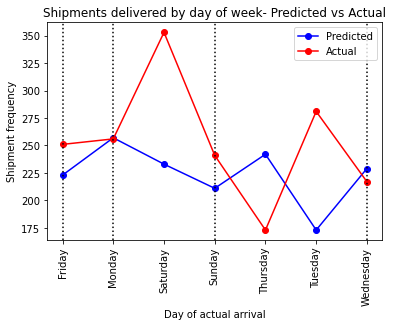

In [16]:
day = [day for day, df in df.groupby('actual_name_of_day')]\

plt.plot(day, df.groupby('predicted_name_of_day').size(), color = 'b', label = 'Predicted', marker = 'o')
plt.plot(day, df.groupby('actual_name_of_day')   .size(), color = 'r', label = 'Actual'   , marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel('Day of actual arrival')
plt.ylabel('Shipment frequency')
plt.title('Shipments delivered by day of week- Predicted vs Actual')
plt.legend(loc = 'best')

xposition = ['Friday','Monday','Sunday','Wednesday']
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle=':')

plt.show()

As we can see from the above graph, only on the marked days, the predicted and actuals lines come close. Also, <b>pt</b> predictions are always <b>accurate</b> when delivery is on <b>Monday</b>.

In [17]:
df['predicted_hour'] = df.pt_predicted_pod_eta.dt.hour
df['actual_hour']    = df.pod_ata.dt.hour

df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,pt_predicted_pod_eta,discharge_time,last_container_event,vessel_legs,actual_scheduled,actual_predicted,actual_name_of_day,predicted_name_of_day,predicted_hour,actual_hour
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,2021-06-11 11:14:29.858889935+00:00,2021-06-11 01:55:03.756274510+00:00,2021-06-12 18:00:00+00:00,2021-06-12 18:00:00+00:00,Vessel arrival,1.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510,Friday,Saturday,18.0,1
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,2021-06-11 03:55:03.756274510+00:00,2021-06-14 07:50:07.504794+00:00,2021-06-12 20:00:00+00:00,Unclassified,1.0,-3 days +06:55:03.756274510,-4 days +20:04:56.251480510,Friday,Monday,7.0,3
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,2021-06-14 02:55:03.756274510+00:00,2021-06-17 20:21:59.522328+00:00,2021-06-15 19:00:00+00:00,Unclassified,1.0,-3 days +07:55:03.756274510,-4 days +06:33:04.233946510,Monday,Thursday,20.0,2
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,2021-05-15 12:14:29.858889935+00:00,2021-05-15 02:55:03.756274510+00:00,2021-05-16 19:00:00+00:00,2021-05-16 19:00:00+00:00,Vessel arrival,1.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510,Saturday,Sunday,19.0,2
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,2021-06-02 17:14:29.858889935+00:00,2021-06-02 07:55:03.756274510+00:00,2021-06-04 00:00:00+00:00,2021-06-04 00:00:00+00:00,Vessel arrival,2.0,-1 days +14:40:33.897384575,-2 days +07:55:03.756274510,Wednesday,Friday,0.0,7


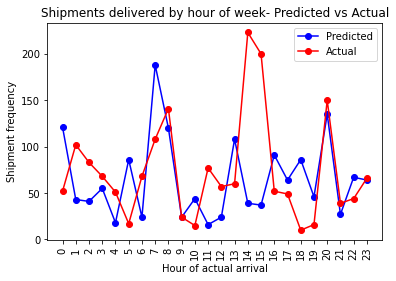

In [18]:
# Plot for comparison of volume of shipments by hour

hour = [hour for hour, df in df.groupby('actual_hour')]

plt.plot(hour, df.groupby('predicted_hour').size(), label = 'Predicted', marker = 'o', color = 'b')
plt.plot(hour, df.groupby('actual_hour').size(), color = 'r', marker = 'o', label = 'Actual')
plt.xticks(hour,rotation = 90)
plt.xlabel('Hour of actual arrival')
plt.ylabel('Shipment frequency')
plt.title('Shipments delivered by hour of week- Predicted vs Actual')
plt.legend(loc = 'best')
plt.show()

This shows the comparison of volume of shipments on the basis of pt predictions and ATA during the hours of a day.

In [19]:
abs(df.groupby(['vessel_legs','pol','pod'])['actual_scheduled'].mean().dt.components['hours'])

vessel_legs  pol    pod  
1.0          CNFOC  USNYC    14
             CNNGB  CAVAN    14
                    USHOU     3
                    USLAX    23
                    USLGB    15
                             ..
3.0          CNFOC  BRFOR    14
             ITGOA  USLAX    14
             KHKOS  USHOU     1
                    USLAX    22
             VNVUT  BRFOR    14
Name: hours, Length: 136, dtype: int64

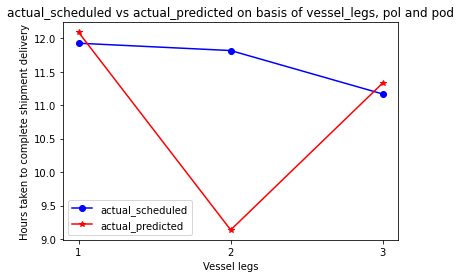

In [20]:
vessel_leg = [vessel_leg for vessel_leg, df in df.groupby('vessel_legs')]

plt.plot(vessel_leg, abs(df.groupby(['vessel_legs','pol','pod'])['actual_scheduled'].mean().dt.components['hours'].groupby('vessel_legs').mean()), 
         color = 'b', marker = 'o', label = 'actual_scheduled')
plt.plot(vessel_leg, abs(df.groupby(['vessel_legs','pol','pod'])['actual_predicted'].mean().dt.components['hours'].groupby('vessel_legs').mean()), 
         color = 'r', marker = '*', label = 'actual_predicted')
plt.xticks(vessel_leg)
plt.ylabel('Hours taken to complete shipment delivery')
plt.xlabel('Vessel legs')
plt.title('actual_scheduled vs actual_predicted on basis of vessel_legs, pol and pod')
plt.legend(loc = 'best')

plt.show()

Vessel legs - transportation connecting points <br>
It's surprising to see that shipment with <b>3 vessel legs takes the least time for delivery compared to 1 leg.</b> I expected to see the opposite outcome.

## Trends

#### Top 10 POL

Most of the shipments come from China. 6 of the biggest ports in the world are in China, out of which 5 are present in our list.

In [21]:
df.groupby('pol').size().reset_index().rename(columns={0:'Count'}).sort_values('Count', ascending = False)[:10]

,pol,Count
7,CNSHG,306
10,CNYTN,284
34,VNVUT,267
31,VNCMT,233
4,CNNGB,228
9,CNXMG,90
15,INMUN,66
6,CNQDG,53
16,INNSA,37
32,VNHPH,35


#### Top 10 POD

Most of the shipments go to the USA !!

In [22]:
df.groupby('pod').size().reset_index().rename(columns={0:'Count'}).sort_values('Count', ascending = False)[:10]

,pod,Count
11,USNYC,747
13,USSAV,326
8,USLAX,203
9,USLGB,128
10,USMOB,93
2,CAVAN,77
15,USTIW,55
12,USORF,47
14,USSEA,41
6,USBAL,12


##### Top POL where date(ATA) == date(pt prediction) 

Looks like pt predictions favor shipments between China and USA !!

In [23]:
df[df.pod_ata.dt.date == df.pt_predicted_pod_eta.dt.date].groupby(['pol','pod']).size().reset_index().rename(columns={0:'Count'})

,pol,pod,Count
0,CNNGB,USNYC,15
1,CNQDG,USNYC,3
2,CNQDG,USSAV,2
3,CNSHG,USNYC,3
4,CNYTN,USMOB,9
5,CNYTN,USVAN,1
6,TWKHH,USNYC,6
7,TWKHH,USORF,4
8,VNCMT,USNYC,9
9,VNVUT,USVAN,1


## Insights for future scope

We are provided with PT predicted ETA in our data set. <br><br>
I believe it would be more insightful and helpful to know the error margin of the predictions as well.<br><br>
Providing an error margin on the predictions prepares the port authorities and customers to know if the shipment will come earlier or later than the predicted time, which can further be used to improve the predictions and reinforce them. <br> 

# Conclusion

1. Filtered and cleaned the data by identifying the underlying gaps and remedying them accordingly. <br>
2. Evaluted the performance of PT predictions provided and compared it with Actual Time of Arrival (ATA) and scheduled_eta. <br>
3. Visualized the data to generate reports. <br>
4. Identified the trends in the data. <br>